# Data Cleaning

Installing necessary dependencies for cartographic visualization.

**Note**: *The installation requries an internet connection*

In [1]:
!sudo apt-get install libgeos-dev
!pip install --user https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756022 sha256=241ccc72316e2e1d1b770f512f3e4db5a0e6da5dbbc95a2412f00f164b3eb1ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-zcvzadz9/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


Importing necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import groupby

import matplotlib.cm

from mpl_toolkits.basemap import Basemap

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import Data File from github

In [3]:
#hello there
url = "https://raw.githubusercontent.com/Vaibhav911/Rainfall-Pattern-Analysis/master/Sub_Division_IMD_2017.csv"
data = pd.read_csv(url)
data
#some changes

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4


In [5]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC' ,'JF', 'MAM', 'JJAS', 'OND', 'ANNUAL']
subdivs = data.SUBDIVISION.unique()
print(subdivs)  #All unique subdivision in data

['Andaman & Nicobar Islands' 'Arunachal Pradesh' 'Assam & Meghalaya'
 'Naga Mani Mizo Tripura' 'Sub Himalayan West Bengal & Sikkim'
 'Gangetic West Bengal' 'Orissa' 'Jharkhand' 'Bihar' 'East Uttar Pradesh'
 'West Uttar Pradesh' 'Uttarakhand' 'Haryana Delhi & Chandigarh' 'Punjab'
 'Himachal Pradesh' 'Jammu & Kashmir' 'West Rajasthan' 'East Rajasthan'
 'West Madhya Pradesh' 'East Madhya Pradesh' 'Gujarat Region'
 'Saurashtra & Kutch' 'Konkan & Goa' 'Madhya Maharashtra' 'Matathwada'
 'Vidarbha' 'Chhattisgarh' 'Coastal Andhra Pradesh' 'Telangana'
 'Rayalseema' 'Tamil Nadu' 'Coastal Karnataka' 'North Interior Karnataka'
 'South Interior Karnataka' 'Kerala' 'Lakshadweep']


###Median of each region
<br>
Here, each column refers to a region. And each row refers to a time-frame as ordered in **months** variable. 
<br>
<br>
**Note**: All the means are calculated ignoring **NaN**

In [6]:
data_median = {} #dictionary to store median of each region
for div in subdivs:
  region_median = []
  for month in months:
    region_median.append(round(data[data["SUBDIVISION"] == div][month].median(), 2)) #doing round off till 2 digits
  data_median[div] = region_median

#show median distribution
pd.DataFrame(data_median)

,Andaman & Nicobar Islands,Arunachal Pradesh,Assam & Meghalaya,Naga Mani Mizo Tripura,Sub Himalayan West Bengal & Sikkim,Gangetic West Bengal,Orissa,Jharkhand,Bihar,East Uttar Pradesh,West Uttar Pradesh,Uttarakhand,Haryana Delhi & Chandigarh,Punjab,Himachal Pradesh,Jammu & Kashmir,West Rajasthan,East Rajasthan,West Madhya Pradesh,East Madhya Pradesh,Gujarat Region,Saurashtra & Kutch,Konkan & Goa,Madhya Maharashtra,Matathwada,Vidarbha,Chhattisgarh,Coastal Andhra Pradesh,Telangana,Rayalseema,Tamil Nadu,Coastal Karnataka,North Interior Karnataka,South Interior Karnataka,Kerala,Lakshadweep
0,32.10,38.90,12.8,7.9,9.4,6.8,5.4,9.5,9.3,11.7,14.2,49.4,14.3,21.6,78.0,90.40,1.6,3.6,4.80,12.8,0.1,0.1,0.0,0.6,0.7,3.7,6.3,2.0,1.0,2.1,10.0,0.15,0.2,0.8,6.0,13.80
1,12.65,85.15,28.3,30.0,19.6,13.6,12.1,16.1,8.2,8.7,10.4,58.6,11.5,21.0,82.1,102.70,1.3,2.2,2.65,11.2,0.0,0.0,0.0,0.2,0.7,4.8,10.7,5.1,3.3,0.9,5.4,0.00,0.3,1.1,8.4,4.10
2,12.15,139.90,75.7,62.7,42.6,18.9,12.7,11.1,6.5,4.1,5.7,46.8,7.2,15.8,83.6,116.00,1.2,1.4,2.00,8.0,0.0,0.0,0.1,1.5,2.7,5.2,7.9,5.7,4.7,4.0,11.9,1.50,4.0,5.2,28.3,5.30
3,54.80,246.90,198.6,161.7,110.9,38.7,28.2,15.6,12.6,3.7,2.9,30.7,2.8,6.7,55.9,86.80,1.4,1.0,1.30,3.1,0.0,0.0,1.2,6.2,4.4,5.6,11.7,20.8,14.0,12.3,36.0,24.70,22.1,39.8,108.4,32.15
4,317.30,306.90,325.7,278.5,268.8,99.6,57.7,42.4,46.3,14.5,8.2,51.0,8.0,9.6,54.3,61.10,6.1,5.7,3.60,5.2,0.9,0.5,9.7,15.2,7.7,6.4,15.5,44.4,21.3,41.4,61.3,80.80,43.2,91.0,190.6,145.85
5,450.25,530.55,509.8,442.6,527.8,226.3,199.4,182.4,163.2,98.2,67.2,141.3,43.7,41.8,85.5,60.00,22.3,53.4,100.50,118.5,112.5,62.1,728.0,146.4,132.2,156.4,184.3,116.9,133.9,57.7,49.8,818.60,101.3,135.9,625.8,326.15
6,379.50,609.35,474.5,430.0,657.7,313.4,341.5,334.9,322.9,284.4,240.8,395.1,139.6,164.8,273.8,163.75,90.5,227.8,305.60,366.8,316.4,168.4,1095.3,248.9,174.8,335.1,393.8,166.3,243.4,87.4,64.9,1102.90,134.9,225.7,687.3,271.50
7,376.40,400.00,400.7,392.8,500.9,292.6,348.8,331.7,292.8,262.6,241.3,384.5,142.3,145.8,256.5,176.40,76.1,223.1,284.00,364.4,230.3,96.1,670.9,187.0,150.4,282.4,395.6,176.1,196.8,98.5,91.3,651.20,117.9,171.2,385.2,198.10
8,428.80,383.70,299.1,309.8,408.4,229.5,237.0,217.6,217.9,177.5,131.7,182.7,67.3,58.8,113.1,65.00,23.4,88.0,151.40,180.8,129.2,55.9,340.7,161.4,163.4,173.0,211.4,169.8,162.3,131.5,114.0,274.10,146.2,138.4,223.9,156.00
9,276.35,172.70,144.1,167.8,128.7,95.9,92.2,55.9,43.1,20.7,9.6,18.8,3.8,3.7,15.6,23.00,1.1,4.7,13.60,23.6,7.1,2.9,90.3,57.8,47.8,37.8,59.7,178.6,62.5,124.4,165.2,178.70,86.5,132.9,282.6,154.30


###Handling missing values
Here, each missing value is replaced by median of corresponding subdivision and time-frame.

**Note**: *Here time-frame represents months, quarters and annual time duration*

In [7]:
pd.isnull(0.0)

False

In [8]:
count = 0
month_num = 0
for index, row in data.iterrows():
  month_num = 0
  for month in months:
    if data.iloc[index][month] == 0:
    # if pd.isnull(data.iloc[index][month]):
      data.at[index, month] = data_median[row['SUBDIVISION']][month_num]
    month_num += 1

# printing data with missing values filled as median
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.10,29.20,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,32.1,159.80,12.20,54.8,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.00,12.15,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.70,12.15,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,12.65,3.30,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.40,37.50,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.10,4.40,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.50,3.70,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.10,3.20,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4


### Stratified sampling with replacement.
Here, 40 values are taken randomly from each subdivision with replacement

In [9]:
strat_data = []
for div in subdivs:
  strat_data.append((data[data.SUBDIVISION == div]).sample(n=40, replace=True))
strat_data = pd.concat(strat_data)
strat_data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
44,Andaman & Nicobar Islands,1950,0.8,12.65,12.15,95.5,264.2,369.9,366.7,347.3,494.5,224.6,89.3,169.4,2422.2,0.8,359.7,1578.4,483.3
18,Andaman & Nicobar Islands,1920,122.3,7.40,3.10,13.0,237.4,546.9,294.4,467.4,505.4,397.5,262.9,85.5,2943.2,129.7,253.5,1814.1,745.9
15,Andaman & Nicobar Islands,1917,8.0,3.60,112.00,4.5,295.9,301.1,394.8,437.4,471.8,238.1,108.3,236.9,2612.4,11.6,412.4,1605.1,583.3
90,Andaman & Nicobar Islands,1996,52.2,4.80,3.40,122.7,298.0,559.2,335.5,328.0,541.6,318.5,254.2,178.8,2996.9,57.0,424.1,1764.3,751.5
64,Andaman & Nicobar Islands,1970,72.2,34.00,7.80,58.2,422.7,407.3,564.6,342.9,423.5,386.6,418.4,232.7,3370.8,106.2,488.7,1738.2,1037.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,Lakshadweep,1927,108.2,14.70,40.70,40.4,229.0,181.2,NaN,42.0,256.0,NaN,NaN,NaN,NaN,122.9,310.1,NaN,NaN
4136,Lakshadweep,1966,21.3,0.20,6.20,4.4,34.9,376.7,421.9,158.9,225.4,266.1,158.0,67.5,1741.5,21.5,45.5,1182.9,491.6
4133,Lakshadweep,1963,126.7,112.90,6.50,72.6,204.6,233.0,367.0,249.9,121.8,113.5,211.5,82.1,1902.1,239.6,283.7,971.7,407.1
4105,Lakshadweep,1935,9.2,7.70,5.30,41.1,15.8,351.8,309.1,277.5,136.4,142.8,145.4,92.4,1529.2,16.9,56.9,1074.8,380.6


### Min-Max Normalization
**Note**: *Normalization is done on a copy data set*

In [0]:
data_norm = data.copy()
data_monthly_only = data_norm[months]
data_norm[months] = (data_monthly_only - data_monthly_only.min()) / (data_monthly_only.max() - data_monthly_only.min())
# data_norm

### State-wise aggregation of dataset
For each subdivision, mean is taken for all the years for each time-frame. Time-frame has been described above


In [11]:
data_aggr = []
for div in subdivs:
  data_aggr.append(data[data['SUBDIVISION'] == div][months].mean())
data_aggr = pd.DataFrame(data_aggr)
data_aggr.insert(0, 'SUBDIVISION', subdivs)
data_aggr

,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JF,MAM,JJAS,OND,ANNUAL
0,Andaman & Nicobar Islands,56.675000,29.718750,33.693182,73.909091,354.829730,470.083636,399.047273,398.613636,440.382569,289.989091,233.018182,157.466972,83.692411,459.419266,1703.708257,678.759633,2926.373585
1,Arunachal Pradesh,46.716327,90.883673,153.972165,265.387879,356.693939,641.817347,691.165306,491.307071,432.005051,194.793814,35.411340,25.050515,137.602041,777.810309,2258.214433,253.648958,3403.959140
2,Assam & Meghalaya,16.860684,31.363248,79.221368,205.102564,340.849573,508.741880,494.565812,403.389744,310.693162,152.497436,26.892308,9.061538,48.220513,625.179487,1717.388889,188.353846,2579.133333
3,Naga Mani Mizo Tripura,14.202564,36.670085,77.442735,171.344444,289.990598,444.772650,437.661538,411.621368,314.517094,175.452991,47.115385,13.204274,50.270940,538.776923,1608.564957,235.107692,2432.717949
4,Sub Himalayan West Bengal & Sikkim,14.447009,22.686325,44.330769,110.911111,268.478632,536.989744,645.700855,520.304274,421.698291,143.943590,16.064103,6.193162,36.735043,423.364103,2124.695726,165.763248,2750.552991
5,Gangetic West Bengal,12.941880,22.741026,29.019658,44.388034,107.810256,246.102564,327.841026,311.882051,245.143590,116.288889,22.626496,5.828205,34.864103,181.220513,1130.959829,143.565812,1490.612821
6,Orissa,12.798291,19.938462,21.158120,33.723932,64.888889,210.450427,350.554701,354.628205,241.194872,113.826496,28.564957,5.739316,31.676068,119.775214,1156.825641,147.174359,1455.448718
7,Jharkhand,17.958974,23.838462,18.391453,19.096581,48.591453,193.304274,337.994017,325.443590,227.136752,79.921368,12.286325,5.023932,41.311966,85.973504,1083.879487,96.519658,1307.689744
8,Bihar,13.640171,14.293162,10.360684,16.848718,53.573504,173.158974,325.188889,298.740171,217.835043,62.944444,7.286325,3.811111,27.392308,80.618803,1014.923932,73.638462,1196.563248
9,East Uttar Pradesh,16.666667,15.837607,9.188889,6.558974,17.473504,109.912821,291.302564,274.402564,183.452137,42.788034,4.619658,6.139316,31.722222,32.689744,859.070085,52.629915,975.864957


### Discretization

Here rainfall distribution is categorized into three sets i.e. low, medium and high

In [12]:
discretized_df=data.copy()
k=3 #k is number of levels
temp=0  #temporary variable used for maintaining count of iterations.
sub_divs=data['SUBDIVISION'].unique()
for div in sub_divs:
  temp_df=data.loc[data['SUBDIVISION'] == div]
  for i in data.columns:
    if i=='SUBDIVISION' or i=='YEAR':
      continue
    max_val=temp_df[i].max()
    min_val=temp_df[i].min()
    delta=(max_val-min_val)/3
    for j in range(temp_df.shape[0]):
      if(discretized_df.loc[j+temp,i]<=min_val+delta):
        discretized_df.loc[j+temp,i]='low'
      elif(discretized_df.loc[j+temp,i]<=min_val+2*delta):
        discretized_df.loc[j+temp,i]='medium'
      else:
        discretized_df.loc[j+temp,i]='high'
  temp+=temp_df.shape[0]

#printing discretized data
discretized_df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,low,medium,low,low,medium,medium,medium,medium,low,medium,high,low,high,low,medium,medium,high
1,Andaman & Nicobar Islands,1902,low,high,low,low,medium,medium,low,high,high,low,medium,low,high,low,low,high,medium
2,Andaman & Nicobar Islands,1903,low,high,low,low,low,medium,high,low,low,low,medium,medium,medium,low,low,medium,medium
3,Andaman & Nicobar Islands,1904,low,low,low,medium,low,medium,medium,low,high,low,medium,low,medium,low,medium,medium,low
4,Andaman & Nicobar Islands,1905,low,low,low,low,low,medium,medium,low,low,low,low,medium,medium,low,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,low,low,low,low,low,medium,medium,low,medium,low,low,low,low,low,low,medium,low
4184,Lakshadweep,2014,low,low,low,low,low,low,low,high,low,low,low,low,low,low,low,medium,low
4185,Lakshadweep,2015,low,low,low,low,low,medium,medium,low,low,low,medium,medium,medium,low,low,low,medium
4186,Lakshadweep,2016,low,low,low,low,low,medium,medium,low,low,low,low,low,low,low,low,low,low


# Data Visualization

Below data is used for cartographic mapping

In [13]:
data_aggr[['SUBDIVISION', 'ANNUAL']]

,SUBDIVISION,ANNUAL
0,Andaman & Nicobar Islands,2926.373585
1,Arunachal Pradesh,3403.959140
2,Assam & Meghalaya,2579.133333
3,Naga Mani Mizo Tripura,2432.717949
4,Sub Himalayan West Bengal & Sikkim,2750.552991
5,Gangetic West Bengal,1490.612821
6,Orissa,1455.448718
7,Jharkhand,1307.689744
8,Bihar,1196.563248
9,East Uttar Pradesh,975.864957


Due to state naming ambiguity in cartographic data required for map and rainfall dataset available to us, below values are entered manually combining or segregating above sub-divisions.

In [0]:
states_group = data.groupby(by = 'SUBDIVISION')
sat_list = [('Andaman and Nicobar', 2927.58), 
('Andhra Pradesh', 1814), 
('Arunachal Pradesh', 3400.62),
('Assam', 2579.13), 
('Bihar', 1196.56),
 ('Chandigarh', 528.43), 
 ('Chhattisgarh', 1369.13),
('Dadra and Nagar Haveli', 0), 
('Daman and Diu', 0), 
('Delhi',528.43), (
'Goa', 2987.53),
('Gujarat', 1413), 
('Haryana', 528.43), 
('Himachal Pradesh', 1256.78), 
('Jammu and Kashmir', 1138.49), 
('Jharkhand', 1307.68), 
('Karnataka', 3500), 
('Kerala', 2914.24), 
('Lakshadweep', 1584.45),
('Madhya Pradesh', 2146), 
('Maharashtra', 2765), 
('Manipur', 2432.71), 
('Meghalaya', 2579.13), 
('Mizoram', 2432.71),
('Nagaland', 2432.71), 
('Orissa', 1455.44), 
('Puducherry', 55), 
('Punjab', 591.43),
 ('Rajasthan', 950),
('Sikkim', 500.55), 
('Tamil Nadu', 940.47), 
('Telangana', 1716), 
('Tripura', 2432.71), 
('Uttar Pradesh', 1800),
('Uttaranchal', 1464.44), 
('West Bengal', 3700)]

State names as used by Shapefile of map

###Rainfall Distribution of India

Average annual rainfall of each state over hundred years is overlapped on map of India.

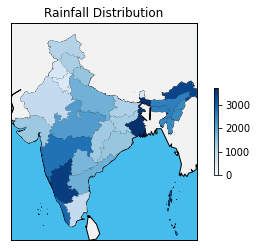

In [17]:
fig, ax = plt.subplots() 
m = Basemap(resolution='c', projection='merc', lat_0=54.5, lon_0=-4.36, llcrnrlon=68., llcrnrlat=6., urcrnrlon=97., urcrnrlat=37.)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()

m.readshapefile('./IND_adm1','INDIA')

satlist = []

for state_info in m.INDIA_info:
    state = state_info['NAME_1']
    sat1 = 0
    
    for x in sat_list:
        if x[0] == state:
            sat1 = x[1]
            break
    satlist.append(sat1)

df_poly = pd.DataFrame({'shapes':[Polygon(np.array(shape), True) for shape in m.INDIA],
                       'area':[area['NAME_1'] for area in m.INDIA_info],
                       'satlist': satlist})
    
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
cmap = plt.get_cmap('Blues')

pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['satlist'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(satlist)
plt.colorbar(mapper, shrink=0.4)

ax.set_title('Rainfall Distribution')
plt.rcParams['figure.figsize'] = [20,15]
plt.show()

###Monthly rainfall distribution

Average rainfall distribution for each subdivision and for each time frame, taken over hundred years.

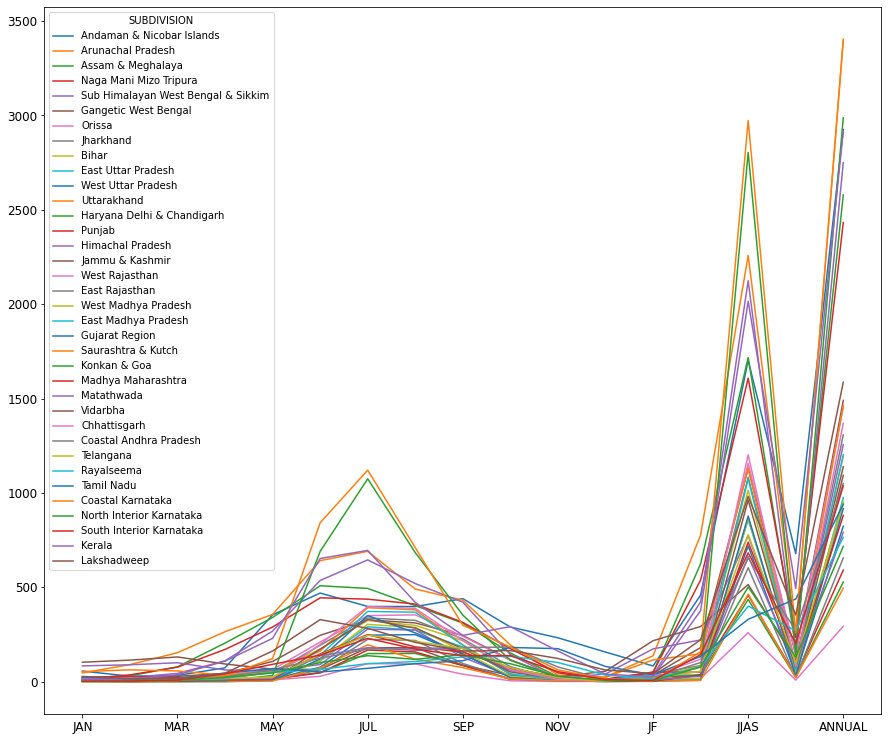

In [18]:
line_plot_1=data_aggr.copy()
line_plot_1.set_index('SUBDIVISION',inplace=True)
line_plot_1.T.plot(figsize=(15,13),legend=True,fontsize=12)
plt.show()

###Average Annual Rainfall Distribution

Pie chart gives percentage rainfall contribution of each subdivision w.r.t rainfall of Indian Subcontinent.

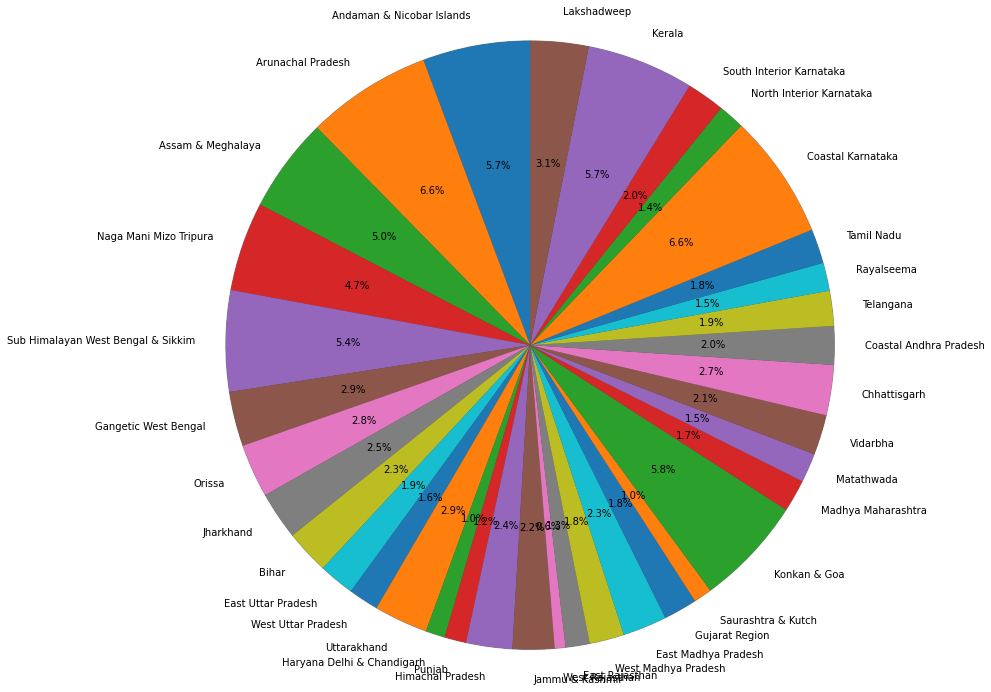

In [19]:
pie_chart_1=data_aggr.copy()
fig1, ax1 = plt.subplots()
ax1.pie(pie_chart_1['ANNUAL'],  labels=pie_chart_1['SUBDIVISION'],
        shadow=True,autopct='%1.1f%%', startangle=90,radius=1000)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

# Post-Midsem Part

In [20]:
# Preprocessed data with missing values filled as median is used
# Modifly Annual rainfall value to be sum of jan to feb after filling missing values as median
data['ANNUAL'] = data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1)
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.10,29.20,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.20,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,32.1,159.80,12.20,54.8,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3607.60,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.00,12.15,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2969.55,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.70,12.15,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3091.75,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,12.65,3.30,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2579.35,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.40,37.50,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.30,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.10,4.40,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.00,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.50,3.70,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.90,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.10,3.20,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.70,71.7,83.2,745.4,165.4


## Data Prepartion part

In [0]:
# Locations variale contain longitude and latitude of all states and regions.
locations = {
             'Andaman & Nicobar Islands': [11.66702557,	92.73598262],
             'Coastal Andhra Pradesh': [15.9129, 79.7400],
             'Rayalseema': [15.9129, 79.7400],
             'Arunachal Pradesh': [27.10039878,	93.61660071],
             'Assam & Meghalaya': [26.160236535,	93.04834082],
             'Bihar': [25.78541445,	87.4799727],
             'Haryana Delhi & Chandigarh': [29.279998733,	77.01000023],
             'Chhattisgarh': [22.09042035, 82.15998734],
             'Dadra and nagar haveli': [20.26657819,	73.0166178],
            #  'Delhi': [28.6699929,	77.23000403],
             'Gujarat Region': [22.2587, 71.1924],
             'Saurashtra & Kutch': [22.2587, 71.1924],
             'Konkan & Goa': [15.491997,	73.81800065],
            #  'Haryana': [28.45000633,	77.01999101],
             'Himachal Pradesh': [31.10002545,	77.16659704],
             'Jammu & Kashmir': [34.29995933,	74.46665849],
             'Jharkhand': [23.80039349,	86.41998572],
            #  'Karnataka': [	12.57038129,	76.91999711],
             'Coastal Karnataka': [12.57038129,	76.91999711], 
             'North Interior Karnataka': [12.57038129,	76.91999711],
             'South Interior Karnataka': [12.57038129,	76.91999711],
             'Kerala' : [8.900372741,	76.56999263],
             'Lakshadweep': [10.56257331,	72.63686717],
            #  'Madhya Pradesh': [21.30039105,	76.13001949],
             'West Madhya Pradesh': [21.30039105,	76.13001949],
             'East Madhya Pradesh': [21.30039105,	76.13001949],
            #  'Maharashtra': [	19.25023195,	73.16017493],
             'Madhya Maharashtra': [19.25023195,	73.16017493],
             'Matathwada': [19.25023195,	73.16017493],
             'Vidarbha': [19.25023195,	73.16017493],
             'Naga Mani Mizo Tripura': [24.503192972,	93.016650248],
             'Meghalaya': [25.57049217,	91.8800142],
            #  'Mizoram': [23.71039899,	92.72001461],
            #  'Nagaland': [25.6669979,	94.11657019],
             'Orissa': [19.82042971,	85.90001746],
             'Pudducherry': [11.93499371,	79.83000037],
             'Punjab': [	31.51997398,	75.98000281],
            #  'Rajasthan': [26.44999921,	74.63998124],
             'East Rajasthan': [26.44999921,	74.63998124],
             'West Rajasthan': [26.44999921,	74.63998124],
             'Sub Himalayan West Bengal & Sikkim': [27.3333303,	88.6166475],
             'Tamil Nadu': [12.92038576,	79.15004187],
             'Telangana': [18.1124, 79.0193],
            #  'Tripura': [	23.83540428,	91.27999914],
             'East Uttar Pradesh': [25.3176, 82.9739],
             'West Uttar Pradesh': [27.59998069,	78.05000565],
             'Uttarakhand': [30.32040895,	78.05000565],
             'Gangetic West Bengal': [	22.58039044, 88.32994665]
}

In [22]:
# Shows all unique states and regions
data['SUBDIVISION'].unique()

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

Only those years are used which are common in all states.<br>
This is done in order to maintain homogenity while calculating distances.

In [23]:
# Calculate intersection of years of all states.
subdivs = data['SUBDIVISION'].unique()
years = set([val for val in range(1900, 2020)])
for div in subdivs:
  years = years.intersection(set(data.loc[data['SUBDIVISION'] == div]['YEAR'].values))

years = list(years)
print(years)

[1916, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949, 1950, 1951, 1952, 1953, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


In [0]:
def temporal_dist(state1_rain, state2_rain):
  """
  Temporal distance calculates Euclidian distance between 
  rainfall data of two regions.
  """
  dist = 0
  for year in years:
    rain1 = state1_rain.loc[state1_rain['YEAR'] == year]['ANNUAL'].values
    rain2 = state2_rain.loc[state2_rain['YEAR'] == year]['ANNUAL'].values
    # print(year, rain1, rain2)
    dist += (rain1 - rain2) ** 2
  return dist**0.5


Regions contains initial clusters. <br> They can be initialized by commenting out appropriate code in the cell.

In [0]:
# regions = pd.Series(data['SUBDIVISION'].unique())
# Select 5 random regions from subdivisions
# regions = regions.sample(5).values
regions = ['Assam & Meghalaya', 'Jammu & Kashmir', 'Gujarat Region', 'North Interior Karnataka', 'East Rajasthan']


## Temporal Clustering
Based on rainfall pattern of two regions.

In [0]:
def temporal_clustering(regions):
  """
  Computes clustering of regions using k-means algorithm.
  Returns a 2-D list, with each element of list containing
  all the regions in a cluster. This is only based on temporal 
  data.
  """
  clusters = [[region] for region in regions]
  for div in subdivs:
    if div in regions:
      continue
    min_dist = 100000000
    min_ind = -1
    for cluster in range(len(clusters)):
      # Calculates mean rainfall of all elements present in a cluster.
      cluster_mean = data.loc[(data['YEAR'].isin(years)) & (data['SUBDIVISION'] == clusters[cluster][0])][['YEAR', 'ANNUAL']].reset_index(drop=True)
      for ind in range(1, len(clusters[cluster])):
        cluster_mean['ANNUAL'] += data.loc[(data['YEAR'].isin(years)) & (data['SUBDIVISION'] == clusters[cluster][ind])]['ANNUAL'].reset_index(drop=True)
      cluster_mean['ANNUAL'] /= len(clusters[cluster])
      div_data = data.loc[data['SUBDIVISION'] == div][['YEAR', 'ANNUAL']]
      dist_with_clust = temporal_dist(cluster_mean, div_data)
      if dist_with_clust[0] < min_dist:
        min_dist = dist_with_clust
        min_ind = cluster
    # Append current region to cluster closest to this region.
    clusters[min_ind].append(div)

  return clusters

temporal_clusters = temporal_clustering(regions)

Display all the clusters.

In [27]:
temporal_clusters

[['Assam & Meghalaya',
  'Andaman & Nicobar Islands',
  'Arunachal Pradesh',
  'Naga Mani Mizo Tripura',
  'Sub Himalayan West Bengal & Sikkim',
  'Konkan & Goa',
  'Coastal Karnataka',
  'Kerala'],
 ['Jammu & Kashmir',
  'Gangetic West Bengal',
  'Orissa',
  'Jharkhand',
  'Bihar',
  'Uttarakhand',
  'Himachal Pradesh',
  'East Madhya Pradesh',
  'Chhattisgarh',
  'Lakshadweep'],
 ['Gujarat Region',
  'East Uttar Pradesh',
  'West Uttar Pradesh',
  'West Madhya Pradesh',
  'Madhya Maharashtra',
  'Vidarbha',
  'Coastal Andhra Pradesh',
  'Telangana',
  'Tamil Nadu',
  'South Interior Karnataka'],
 ['North Interior Karnataka', 'Matathwada', 'Rayalseema'],
 ['East Rajasthan',
  'Haryana Delhi & Chandigarh',
  'Punjab',
  'West Rajasthan',
  'Saurashtra & Kutch']]

In [28]:
from scipy.stats.stats import pearsonr

for div1 in subdivs:
  div1_data = data.loc[(data['YEAR'].isin(years)) & (data['SUBDIVISION'] == div1)]['ANNUAL'].reset_index(drop=True).values
  for div2 in subdivs:
    if div1 == div2:
      continue
    div2_data = data.loc[(data['YEAR'].isin(years)) & (data['SUBDIVISION'] == div2)]['ANNUAL'].reset_index(drop=True).values
    print(div1 + " | " +  div2 + " | " + str(pearsonr(div1_data, div2_data)))


Andaman & Nicobar Islands | Arunachal Pradesh | (-0.07805083561373012, 0.45461238226461387)
Andaman & Nicobar Islands | Assam & Meghalaya | (-0.15191746552101223, 0.14382735559796767)
Andaman & Nicobar Islands | Naga Mani Mizo Tripura | (-0.055203282926511034, 0.5971816526214156)
Andaman & Nicobar Islands | Sub Himalayan West Bengal & Sikkim | (0.06843272366844896, 0.5122286192113362)
Andaman & Nicobar Islands | Gangetic West Bengal | (-0.018236092522982007, 0.8615084300518203)
Andaman & Nicobar Islands | Orissa | (0.061024908928570785, 0.5590272050002631)
Andaman & Nicobar Islands | Jharkhand | (0.010946070829713859, 0.9166065189257518)
Andaman & Nicobar Islands | Bihar | (0.05305241270698868, 0.6115669924481217)
Andaman & Nicobar Islands | East Uttar Pradesh | (0.15897269053243404, 0.1259115303982596)
Andaman & Nicobar Islands | West Uttar Pradesh | (-0.004622746177575407, 0.9647292492569798)
Andaman & Nicobar Islands | Uttarakhand | (-8.157614991268955e-05, 0.9993773886816405)
Andam

## Outlier Analysis
Based on temporal data.

In [0]:
def find_temporal_outliers(clusters):
  """
  Calculates outliers present in each cluster.
  Element that is farthest away from the mean of
  a cluster is considered as an outlier.
  Each region gives one outlier.
  """
  outliers = []

  for cluster in range(len(clusters)):
    # Calculates cluster mean rainfall.
    cluster_mean = data.loc[(data['YEAR'].isin(years)) & (data['SUBDIVISION'] == clusters[cluster][0])][['YEAR', 'ANNUAL']].reset_index(drop=True)
    for ind in range(1, len(clusters[cluster])):
      cluster_mean['ANNUAL'] += data.loc[(data['YEAR'].isin(years)) & (data['SUBDIVISION'] == clusters[cluster][ind])]['ANNUAL'].reset_index(drop=True)
    cluster_mean['ANNUAL'] /= len(clusters[cluster])

    dist_list = []
    # Check the distance of each element in cluster
    # from mean of the cluster.
    for cluster_elem in clusters[cluster]:
      cluster_elem_data = data.loc[(data['YEAR'].isin(years)) & (data['SUBDIVISION'] == cluster_elem)][['YEAR','ANNUAL']].reset_index(drop=True)
      dist_list.append( temporal_dist(cluster_mean, cluster_elem_data)[0] )
    
    max_dist = -1
    max_dist_ind = -1
    mean_dist = np.mean(dist_list)
    for ind in range(len(dist_list)):
      if abs( dist_list[ind] - mean_dist ) > max_dist:
        max_dist = abs( dist_list[ind] - mean_dist )
        max_dist_ind = ind
    outliers.append(clusters[cluster][max_dist_ind])
  
  return outliers
    
temporal_outliers = find_temporal_outliers(temporal_clusters)
      

Display the outliers in each cluster.

In [30]:
temporal_outliers

['Arunachal Pradesh',
 'Lakshadweep',
 'Gujarat Region',
 'North Interior Karnataka',
 'West Rajasthan']

## Spatio-temporal analysis.

In [0]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [0]:
def spatio_temporal_dist(div1_data, div2_data, div1_long, div1_lat, div2_long, div2_lat):
  """
  Calculates spatio-temporal distance between two regions.
  Spatio temporal distance is calculatd as sum of temporal
  distance summation sum of spatial distance in equal
  proportions.
  """
  temp_dist = temporal_dist(div1_data, div2_data)[0]
  spatial_dist = haversine(div1_long, div1_lat, div2_long, div2_lat)
  # print(temporal_dist, spatial_dist)
  return (1 * temp_dist) + (1 * spatial_dist)

### Spatio-temporal clustering

In [0]:
def spatio_temporal_clustering():
  """
  Calculates spatio-temporal clusters using 
  k-means. Each region is assigned the cluster it 
  is closest to. Returns a 2-D list of clusters.
  """
  clusters = [[region] for region in regions]
  for div in subdivs:
    # Find appropriate cluster for each division.
    if div in regions:
      continue

    min_dist = 100000000
    min_ind = -1

    for cluster in range(len(clusters)):
      # Calculates mean parameters of each cluster.
      cluster_mean_long = locations[clusters[cluster][0]][1]
      cluster_mean_lat = locations[clusters[cluster][0]][0]
      cluster_mean_rain = data.loc[(data['YEAR'].isin(years)) & (data['SUBDIVISION'] == clusters[cluster][0])][['YEAR', 'ANNUAL']].reset_index(drop=True)
      
      for ind in range(1, len(clusters[cluster])):
        cluster_mean_rain['ANNUAL'] += data.loc[(data['YEAR'].isin(years)) & (data['SUBDIVISION'] == clusters[cluster][ind])]['ANNUAL'].reset_index(drop=True)
        cluster_mean_long += locations[clusters[cluster][ind]][1]
        cluster_mean_lat += locations[clusters[cluster][ind]][0]

      cluster_mean_rain['ANNUAL'] /= len(clusters[cluster])
      cluster_mean_long /= len(clusters[cluster])
      cluster_mean_lat /= len(clusters[cluster])

      div_data = data.loc[data['SUBDIVISION'] == div][['YEAR', 'ANNUAL']]
      div_long = locations[div][1]
      div_lat = locations[div][0]

      dist_with_clust = spatio_temporal_dist(cluster_mean_rain, div_data, cluster_mean_long, cluster_mean_lat, div_long, div_lat)
      if dist_with_clust < min_dist:
        min_dist = dist_with_clust
        min_ind = cluster
    clusters[min_ind].append(div)
  return clusters

spatio_temporal_clusters = spatio_temporal_clustering()

Display all spatio-temporal clusters found.

In [34]:
spatio_temporal_clusters

[['Assam & Meghalaya',
  'Andaman & Nicobar Islands',
  'Arunachal Pradesh',
  'Naga Mani Mizo Tripura',
  'Sub Himalayan West Bengal & Sikkim',
  'Konkan & Goa',
  'Coastal Karnataka',
  'Kerala'],
 ['Jammu & Kashmir',
  'Gangetic West Bengal',
  'Orissa',
  'Jharkhand',
  'Bihar',
  'East Uttar Pradesh',
  'Uttarakhand',
  'Himachal Pradesh',
  'East Madhya Pradesh',
  'Chhattisgarh',
  'Lakshadweep'],
 ['Gujarat Region',
  'West Madhya Pradesh',
  'Madhya Maharashtra',
  'Matathwada',
  'Vidarbha',
  'Coastal Andhra Pradesh',
  'Telangana',
  'South Interior Karnataka'],
 ['North Interior Karnataka', 'Rayalseema', 'Tamil Nadu'],
 ['East Rajasthan',
  'West Uttar Pradesh',
  'Haryana Delhi & Chandigarh',
  'Punjab',
  'West Rajasthan',
  'Saurashtra & Kutch']]

## Outlier Analysis
Based on spatio-temporal clustering.

In [0]:
def find_spatio_temporal_outliers(clusters):
  """
  Finds outliers present in each cluster based on 
  spatio-temporal distance. Farthest element from mean of
  each cluster is classified as an outlier.
  """
  outliers = []

  for cluster in range(len(clusters)):
    # Calculate mean parameters of a cluster.
    cluster_mean_long = locations[clusters[cluster][0]][1]
    cluster_mean_lat = locations[clusters[cluster][0]][0]
    cluster_mean_rain = data.loc[(data['YEAR'].isin(years)) & (data['SUBDIVISION'] == clusters[cluster][0])][['YEAR', 'ANNUAL']].reset_index(drop=True)
      
    for ind in range(1, len(clusters[cluster])):
      cluster_mean_rain['ANNUAL'] += data.loc[(data['YEAR'].isin(years)) & (data['SUBDIVISION'] == clusters[cluster][ind])]['ANNUAL'].reset_index(drop=True)
      cluster_mean_long += locations[clusters[cluster][ind]][1]
      cluster_mean_lat += locations[clusters[cluster][ind]][0]

    cluster_mean_rain['ANNUAL'] /= len(clusters[cluster])
    cluster_mean_long /= len(clusters[cluster])
    cluster_mean_lat /= len(clusters[cluster])

    dist_list = []
    # Find farthest element from mean in each cluster.
    for cluster_elem in clusters[cluster]:
      cluster_elem_data = data.loc[(data['YEAR'].isin(years)) & (data['SUBDIVISION'] == cluster_elem)][['YEAR','ANNUAL']].reset_index(drop=True)
      cluster_elem_long = locations[cluster_elem][1]
      cluster_elem_lat = locations[cluster_elem][0]
      dist_list.append( spatio_temporal_dist(cluster_mean_rain, cluster_elem_data, cluster_mean_long, cluster_mean_lat, cluster_elem_long, cluster_elem_lat) )
    
    max_dist = -1
    max_dist_ind = -1
    mean_dist = np.mean(dist_list)
    for ind in range(len(dist_list)):
      if abs( dist_list[ind] - mean_dist ) > max_dist:
        max_dist = abs( dist_list[ind] - mean_dist )
        max_dist_ind = ind
    outliers.append(clusters[cluster][max_dist_ind])
  
  return outliers

spatio_temporal_outliers = find_spatio_temporal_outliers(spatio_temporal_clusters)

Display all outliers based on spatio-temporal distance.

In [36]:
spatio_temporal_outliers

['Arunachal Pradesh',
 'Lakshadweep',
 'Gujarat Region',
 'Rayalseema',
 'West Uttar Pradesh']